# Find the Lane Lines on road
#### We identify the lane lines by using color
#### White color is [255, 255, 255] in [R,G,B] notation

## Import the packages necessary

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## L2-3 Color Selection

### Read image from the assets using matplotlib

In [4]:
image = mpimg.imread('assets/imageL2-3.jpg')
print('This image is:', type(image), ' with dimensions: ', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions:  (540, 960, 3)


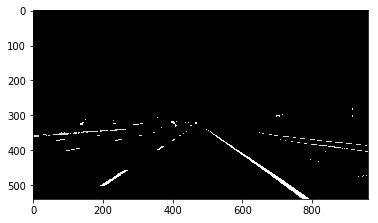

In [8]:
# make a copy of the image to work on rather than
# working on the original image.
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# define a rgb_threshold.
red_threshold = 200
blue_threshold = 200
green_threshold = 200
rgb_threshold = [red_threshold, blue_threshold, green_threshold]

# filter the original image with the given rgb_values and
# set values below threshold to black[0,0,0].
thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0, 0, 0]

# Display the filtered image
plt.imshow(color_select)
plt.show()

## L2-5 Region Of Interest

### Triangular region of interest from the bottom of image.

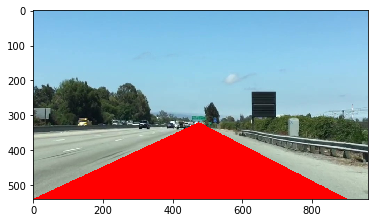

In [31]:
region_select = np.copy(image)

# Define a triangular region of interest
# In image processing, (0, 0) is the top left corner of the image
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

# fit lines (y=Ax+B) to find the triangular region
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# find the region inside the triangle
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# color the pixels which are inside the R.O.I
region_select[region_thresholds] = [255, 0, 0] #red

# Display the mask
plt.imshow(region_select)
plt.show()

## L2-6 Combine both color and ROI

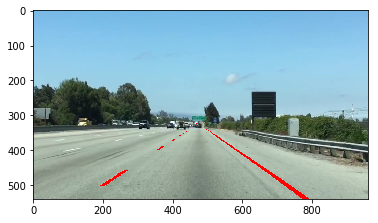

In [32]:
line_image = np.copy(image)

# Find out where the image is colored right and in the region
line_image[~thresholds & region_thresholds] = [255, 0, 0]

plt.imshow(color_select)
plt.imshow(line_image)
plt.show()